In [5]:
from IPython.display import HTML, Image

In [6]:
HTML(<script>
  function code_toggle() {
    if (code_shown){
      ('div.input').hide('500');
      ('#toggleButton').val('Show Code')
    } else {
      ('div.input').show('500');
      ('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  ( document ).ready(function(){
    code_shown=false;
    ('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>)

SyntaxError: invalid syntax (<ipython-input-6-0253a2024593>, line 1)

# Final Presentation

### Does Fatigue relate to Performance (RPE)?

* We found statistical evidence to support the fact that fatigue is a good indicator variable for how players rate their performance
* Findings held for all types of training sessions.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

from scipy import stats

rpe = pd.read_csv("../processed_data/RPE_Clean.csv")
norm_fat = pd.read_csv("../processed_data/Normalized_Fatigue.csv")

#Fatigue levels compared to training types and the rpe data
rpe_wellness = pd.merge(rpe, norm_fat, on = ['Date'], how = "outer")
rpe_wellness.rename(columns={'NormalizedFat':'Fatigue'}, inplace=True)

strength_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Strength']
skill_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Skills']
speed_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Speed']
mob_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Mobility/Recovery']
cond_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Conditioning']
game_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Game']
combat_train = rpe_wellness.loc[rpe_wellness['SessionType'] == 'Combat']

strength_rpe = strength_train['RPE'].value_counts()
skill_rpe = skill_train['RPE'].value_counts()
speed_rpe = speed_train['RPE'].value_counts()
mob_rpe = mob_train['RPE'].value_counts()
cond_rpe = cond_train['RPE'].value_counts()
game_rpe = game_train['RPE'].value_counts()
combat_rpe = combat_train['RPE'].value_counts()


columns = ['Workout Type', 'Median RPE', 'Median Fatigue']
workout_rpe_fatigue = pd.DataFrame(columns = columns)



workout_rpe_fatigue = pd.DataFrame({
                        'Workout Type' : [
                                            "Strength", "Strength","Strength","Strength","Strength","Strength","Strength","Strength","Strength","Strength",
                                            "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill",
                                            "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", 
                                            "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", 
                                            "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", 
                                            "Game", "Game", "Game", "Game", "Game", "Game", "Game", "Game", "Game", 
                                            "Combat", "Combat", "Combat", "Combat", "Combat", "Combat", "Combat", "Combat" 
                                         ],
                        'RPE'   : [
                                            strength_rpe.keys()[9], strength_rpe.keys()[8], strength_rpe.keys()[6], strength_rpe.keys()[3], strength_rpe.keys()[1], strength_rpe.keys()[0], strength_rpe.keys()[2], strength_rpe.keys()[4], strength_rpe.keys()[5], strength_rpe.keys()[7],
                                            skill_rpe.keys()[9], skill_rpe.keys()[5], skill_rpe.keys()[3], skill_rpe.keys()[0], skill_rpe.keys()[1], skill_rpe.keys()[2], skill_rpe.keys()[4], skill_rpe.keys()[6], skill_rpe.keys()[7], skill_rpe.keys()[8],
                                            speed_rpe.keys()[7], speed_rpe.keys()[6], speed_rpe.keys()[3], speed_rpe.keys()[0], speed_rpe.keys()[1], speed_rpe.keys()[2], speed_rpe.keys()[4], speed_rpe.keys()[5], speed_rpe.keys()[8],
                                            mob_rpe.keys()[0], mob_rpe.keys()[1], mob_rpe.keys()[2], mob_rpe.keys()[3], mob_rpe.keys()[5], mob_rpe.keys()[4],
                                            cond_rpe.keys()[9], cond_rpe.keys()[7], cond_rpe.keys()[8], cond_rpe.keys()[6], cond_rpe.keys()[5], cond_rpe.keys()[2], cond_rpe.keys()[4], cond_rpe.keys()[0], cond_rpe.keys()[1], cond_rpe.keys()[3],
                                            game_rpe.keys()[5], game_rpe.keys()[8], game_rpe.keys()[7], game_rpe.keys()[6], game_rpe.keys()[4], game_rpe.keys()[3], game_rpe.keys()[0], game_rpe.keys()[1], game_rpe.keys()[2],
                                            combat_rpe.keys()[6], combat_rpe.keys()[4], combat_rpe.keys()[0], combat_rpe.keys()[2], combat_rpe.keys()[1], combat_rpe.keys()[3], combat_rpe.keys()[5], combat_rpe.keys()[7]
                                         ],
                       'Median Fatigue':[
                                            strength_train.loc[strength_train['RPE'] == 0.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 1.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 2.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 3.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 4.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 5.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 6.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 7.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 8.0]['Fatigue'].median(), strength_train.loc[strength_train['RPE'] == 9.0]['Fatigue'].median(),
                                            skill_train.loc[skill_train['RPE'] == 0.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 1.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 2.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 3.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 4.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 5.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 6.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 7.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 8.0]['Fatigue'].median(), skill_train.loc[skill_train['RPE'] == 9.0]['Fatigue'].median(),
                                            speed_train.loc[speed_train['RPE'] == 0.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 1.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 2.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 3.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 4.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 5.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 6.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 7.0]['Fatigue'].median(), speed_train.loc[speed_train['RPE'] == 8.0]['Fatigue'].median(),
                                            mob_train.loc[mob_train['RPE'] == 0.0]['Fatigue'].median(), mob_train.loc[mob_train['RPE'] == 1.0]['Fatigue'].median(), mob_train.loc[mob_train['RPE'] == 2.0]['Fatigue'].median(), mob_train.loc[mob_train['RPE'] == 3.0]['Fatigue'].median(), mob_train.loc[mob_train['RPE'] == 4.0]['Fatigue'].median(), mob_train.loc[mob_train['RPE'] == 5.0]['Fatigue'].median(),
                                            cond_train.loc[cond_train['RPE'] == 0.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 1.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 2.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 3.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 4.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 5.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 6.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 7.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 8.0]['Fatigue'].median(), cond_train.loc[cond_train['RPE'] == 9.0]['Fatigue'].median(),
                                            game_train.loc[game_train['RPE'] == 1.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 2.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 3.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 4.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 5.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 6.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 7.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 8.0]['Fatigue'].median(), game_train.loc[game_train['RPE'] == 9.0]['Fatigue'].median(),
                                            combat_train.loc[combat_train['RPE'] == 0.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 2.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 3.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 4.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 5.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 6.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 7.0]['Fatigue'].median(), combat_train.loc[combat_train['RPE'] == 8.0]['Fatigue'].median()       
                                          ]
     
                    })
workout_rpe_fatigue.to_csv(path_or_buf = '../processed_data/workout_rpe_fatigue.csv', index = False)

#Fatigue levels compared to training types and the rpe data... Outputs mean fatigue
workout_rpe_fatigue_mean = pd.DataFrame({
                        'Workout Type' : [
                                            "Strength", "Strength","Strength","Strength","Strength","Strength","Strength","Strength","Strength","Strength",
                                            "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill", "Skill",
                                            "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", "Speed", 
                                            "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", "Mobility/Recovery", 
                                            "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", "Conditioning", 
                                            "Game", "Game", "Game", "Game", "Game", "Game", "Game", "Game", "Game", 
                                            "Combat", "Combat", "Combat", "Combat", "Combat", "Combat", "Combat", "Combat" 
                                         ],
                        'RPE'   : [
                                            strength_rpe.keys()[9], strength_rpe.keys()[8], strength_rpe.keys()[6], strength_rpe.keys()[3], strength_rpe.keys()[1], strength_rpe.keys()[0], strength_rpe.keys()[2], strength_rpe.keys()[4], strength_rpe.keys()[5], strength_rpe.keys()[7],
                                            skill_rpe.keys()[9], skill_rpe.keys()[5], skill_rpe.keys()[3], skill_rpe.keys()[0], skill_rpe.keys()[1], skill_rpe.keys()[2], skill_rpe.keys()[4], skill_rpe.keys()[6], skill_rpe.keys()[7], skill_rpe.keys()[8],
                                            speed_rpe.keys()[7], speed_rpe.keys()[6], speed_rpe.keys()[3], speed_rpe.keys()[0], speed_rpe.keys()[1], speed_rpe.keys()[2], speed_rpe.keys()[4], speed_rpe.keys()[5], speed_rpe.keys()[8],
                                            mob_rpe.keys()[0], mob_rpe.keys()[1], mob_rpe.keys()[2], mob_rpe.keys()[3], mob_rpe.keys()[5], mob_rpe.keys()[4],
                                            cond_rpe.keys()[9], cond_rpe.keys()[7], cond_rpe.keys()[8], cond_rpe.keys()[6], cond_rpe.keys()[5], cond_rpe.keys()[2], cond_rpe.keys()[4], cond_rpe.keys()[0], cond_rpe.keys()[1], cond_rpe.keys()[3],
                                            game_rpe.keys()[5], game_rpe.keys()[8], game_rpe.keys()[7], game_rpe.keys()[6], game_rpe.keys()[4], game_rpe.keys()[3], game_rpe.keys()[0], game_rpe.keys()[1], game_rpe.keys()[2],
                                            combat_rpe.keys()[6], combat_rpe.keys()[4], combat_rpe.keys()[0], combat_rpe.keys()[2], combat_rpe.keys()[1], combat_rpe.keys()[3], combat_rpe.keys()[5], combat_rpe.keys()[7]
                                         ],
                       'Mean Fatigue':[
                                            strength_train.loc[strength_train['RPE'] == 0.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 1.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 2.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 3.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 4.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 5.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 6.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 7.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 8.0]['Fatigue'].mean(), strength_train.loc[strength_train['RPE'] == 9.0]['Fatigue'].mean(),
                                            skill_train.loc[skill_train['RPE'] == 0.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 1.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 2.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 3.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 4.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 5.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 6.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 7.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 8.0]['Fatigue'].mean(), skill_train.loc[skill_train['RPE'] == 9.0]['Fatigue'].mean(),
                                            speed_train.loc[speed_train['RPE'] == 0.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 1.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 2.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 3.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 4.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 5.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 6.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 7.0]['Fatigue'].mean(), speed_train.loc[speed_train['RPE'] == 8.0]['Fatigue'].mean(),
                                            mob_train.loc[mob_train['RPE'] == 0.0]['Fatigue'].mean(), mob_train.loc[mob_train['RPE'] == 1.0]['Fatigue'].mean(), mob_train.loc[mob_train['RPE'] == 2.0]['Fatigue'].mean(), mob_train.loc[mob_train['RPE'] == 3.0]['Fatigue'].mean(), mob_train.loc[mob_train['RPE'] == 4.0]['Fatigue'].mean(), mob_train.loc[mob_train['RPE'] == 5.0]['Fatigue'].mean(),
                                            cond_train.loc[cond_train['RPE'] == 0.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 1.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 2.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 3.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 4.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 5.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 6.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 7.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 8.0]['Fatigue'].mean(), cond_train.loc[cond_train['RPE'] == 9.0]['Fatigue'].mean(),
                                            game_train.loc[game_train['RPE'] == 1.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 2.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 3.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 4.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 5.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 6.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 7.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 8.0]['Fatigue'].mean(), game_train.loc[game_train['RPE'] == 9.0]['Fatigue'].mean(),
                                            combat_train.loc[combat_train['RPE'] == 0.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 2.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 3.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 4.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 5.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 6.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 7.0]['Fatigue'].mean(), combat_train.loc[combat_train['RPE'] == 8.0]['Fatigue'].mean()       
                                          ]
     
                    })
workout_rpe_fatigue_mean
workout_rpe_fatigue_mean.to_csv(path_or_buf = '../processed_data/workout_rpe_fatigue_mean.csv', index = False)

##Plotting the fatigue vs. rpe for all the sessions and individual sessions
#All sessions stacked
sns.set_style('whitegrid')

strength_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Strength'])
strength_fat.set(ylim = (0,10))

skill_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Skill'])
skill_fat.set(ylim = (0,10))

speed_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Speed'])
speed_fat.set(ylim = (0,10))

mob_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Mobility/Recovery'])
mob_fat.set(ylim = (0,10))

cond_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Conditioning'])
cond_fat.set(ylim = (0,10))
"""game_fat = sns.regplot(y = 'RPE',
             x = 'Mean Fatigue',
             data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Game'])
game_fat.set(ylim = (0,10))"""
combat_fat = sns.regplot(y = 'RPE',
            x = 'Mean Fatigue',
            data = workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Combat'])
combat_fat.set(ylim = (0,10))

plt.show()


<Figure size 640x480 with 1 Axes>

Overall regression for all session types for all players:

In [4]:
#Looking at the summary statistics for the various session types and determining signficance
strength_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Strength']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Strength']['RPE'])
skill_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Skill']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Skill']['RPE'])
speed_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Speed']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Speed']['RPE'])
mob_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Mobility/Recovery']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Mobility/Recovery']['RPE'])
cond_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Conditioning']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Conditioning']['RPE'])
game_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Game']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Game']['RPE'])
combat_summary = stats.linregress(workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Combat']['Mean Fatigue'],
                 workout_rpe_fatigue_mean.loc[workout_rpe_fatigue_mean['Workout Type'] == 'Combat']['RPE'])

strength_summary

LinregressResult(slope=-15.992728704391677, intercept=5.253955436566669, rvalue=-0.6730398388015063, pvalue=0.03292917709901607, stderr=6.213515204554453)

### Session Impact on Fatigue

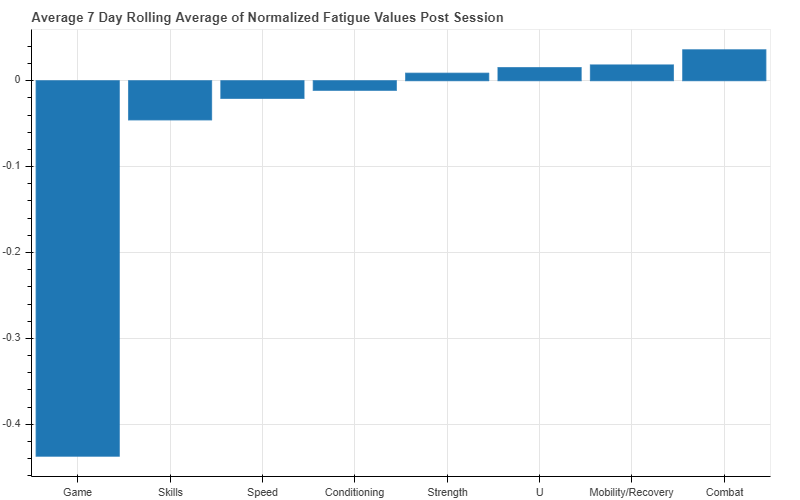

In [5]:
Image(filename="../Figures/7d_fatigue_postsession.png", width=800, height=500)

### Fatigue graphs over the course of a season

Next, we wanted to graph the fatigue ratings for each player over the course of the season.

Things to note...<br/>
    -Overall decline as the season wears on.<br/>
    -Notice how fatigue is impacted by games.<br/>
    -Cyclical nature of fatigue after games.<br/>
    

In [6]:
import pandas as pd

from ipywidgets import interact
from bokeh.io import push_notebook
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Category20 as palette
import itertools
output_notebook()

Loading BokehJS ...

In [7]:
rpe_df = pd.read_csv("../processed_data/RPE_Clean.csv")
rpe_df.Date = pd.to_datetime(rpe_df.Date)

In [8]:
normfat_df = pd.read_csv("../processed_data/Normalized_Fatigue.csv")
normfat_df.Date = pd.to_datetime(normfat_df.Date)
normfat_df = normfat_df.sort_values(by=["Date"])

pid_df = normfat_df.groupby('PlayerID').apply(lambda x: x.set_index('Date').resample('1D').first())

In [9]:
pgd_df = pd.read_csv("../processed_data/player_game_date.csv")
pgd_df.Date = pd.to_datetime(pgd_df.Date)

In [10]:
session_types = sorted(rpe_df.SessionType.drop_duplicates().to_list())
      
players = sorted(pgd_df.PlayerID.drop_duplicates().to_list())

In [11]:
def get_dataset(player, day_count):
    player_sessions = rpe_df[rpe_df.PlayerID == player][["Date", "SessionType"]]
    
    df1 = pid_df.groupby(level=0)['NormalizedFat'].apply(lambda x: x.shift().rolling(min_periods=1,window=day_count).mean()).reset_index(name='NormalizedFat')
    fatigue_df = df1[df1.PlayerID == player][["Date", "NormalizedFat"]]
    
    player_sessions = pd.merge(player_sessions, fatigue_df, how='inner', on='Date')
    return player_sessions, fatigue_df

In [12]:
p1 = figure(height=500, width=800, x_axis_type="datetime", x_axis_label="Date", y_axis_label="Normalized Fatigue")

sessions, fatigue = get_dataset(1, 2)
l1 = p1.line("Date", "NormalizedFat", source=fatigue)

sesh_type_to_circle = {}

color_iter = itertools.cycle(palette[20])
sesh_type_to_color = {sesh_type: color for sesh_type, color in zip(session_types, color_iter)}

for sesh_type in session_types:
    source = sessions[sessions.SessionType == sesh_type][["Date", "NormalizedFat", "SessionType"]]
    c = p1.circle(
        "Date",
        "NormalizedFat",
        size=6,
        alpha=0.75,
        legend=sesh_type,
        color=sesh_type_to_color[sesh_type],
        source=source,
        name=sesh_type
    )
    sesh_type_to_circle[sesh_type] = c

In [13]:
hover1 = HoverTool(
    tooltips=[
        ("date", "@Date{%F}"),
        ('Type', '@SessionType')
    ],
    names=session_types
)
hover1.formatters = { "Date": "datetime"}
p1.add_tools(hover1)

In [14]:
h1 = show(p1, notebook_handle=True)

In [15]:
def update_graph(player, day_count, **kwargs):
    sessions, fatigue = get_dataset(player, day_count)
    good_sesh_types = [sesh_type for sesh_type, keep in kwargs.items() if keep is True]
    bad_sesh_types = [sesh_type for sesh_type, keep in kwargs.items() if keep is False]
    
    l1.data_source.data.update({
        "Date": sessions.Date,
        "NormalizedFat": sessions.NormalizedFat,
        "index": sessions.index
    })
    
    for sesh_type in bad_sesh_types:
        c = sesh_type_to_circle[sesh_type]
        c.visible = False
        
    for sesh_type in good_sesh_types:
        c = sesh_type_to_circle[sesh_type]
        c.visible = True
        
        source = sessions[sessions.SessionType == sesh_type]
        c.data_source.data.update({
            "Date": source.Date,
            "NormalizedFat": source.NormalizedFat,
            "SessionType": source.SessionType,
            "index": source.index
        })
    push_notebook(handle=h1)

initial_types = {sesh_type: True for sesh_type in session_types}
interact(update_graph, player=players, day_count=(2, 20), **initial_types)

interactive(children=(Dropdown(description='player', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

<function __main__.update_graph(player, day_count, **kwargs)>

In [16]:
speed_df = pd.read_csv("../processed_data/avgspeed_isplaying.csv")

In [17]:
players = sorted(speed_df.PlayerID.drop_duplicates().to_list())
games = sorted(speed_df.GameID.drop_duplicates().to_list())

In [18]:
def fill_gaps(df):
    if df.size > 0:
        df = df.set_index("FrameID")
        idxmin = df.index.min()
        idxmax = df.index.max()
        full_frames = np.arange(idxmin, idxmax, dtype=int)
        df = df.reindex(full_frames, fill_value=np.NaN).reset_index()
    return df

In [19]:
def get_data(player, game, show_inactive):
    ret_df = speed_df[(speed_df.PlayerID == player) & (speed_df.GameID == game)]
    if show_inactive is False:
        ret_df = ret_df[ret_df.IsPlaying == True]
    return fill_gaps(ret_df[["FrameID", "AvgSpeed"]])

In [20]:
initial_dataset = get_data(2, 1, True)
p = figure(height=500, width=800, x_axis_label="Frame ID", y_axis_label="Average Speed")
l = p.line("FrameID", "AvgSpeed", source=ColumnDataSource(initial_dataset))

In [21]:
h = show(p, notebook_handle=True)

In [22]:
def update(player, game, show_inactive):
    dataset = get_data(player, game, show_inactive)
    l.data_source.data.update({
        'FrameID': dataset.FrameID,
        'AvgSpeed': dataset.AvgSpeed,
        'index': dataset.index
    })
    push_notebook(handle=h)
interact(update, player=players, game=games, show_inactive=True)

interactive(children=(Dropdown(description='player', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

<function __main__.update(player, game, show_inactive)>

Inspection of meta game data (Average Speed) throughout duration of game

## Our Solution

We set out to find a relationship between a player's exertion in game and the likelihood to recover in a given amount of time.
Exertion was measured using the following equation:
$$Exertion(t) = AvgSpeed(t) \times ActiveTime + (Accel(t) - MeanAccel)^2$$

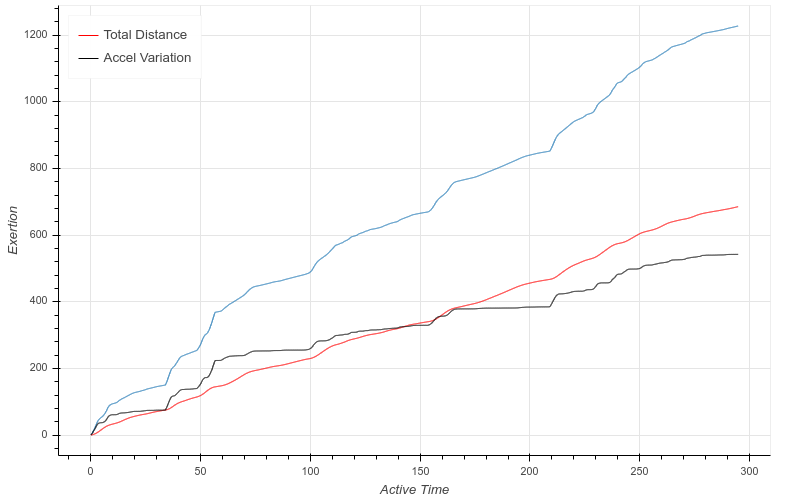

In [23]:
Image(filename="../Figures/p13_exertion_over_time.png")

The mean and standard deviation of the exertion measurements for each player were found for every game. The following image contains a histogram example of the data for Player 13.

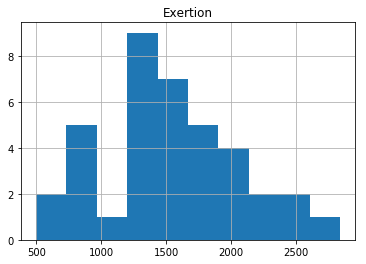

In [24]:
Image(filename="../Figures/p13_exertion.png", width=400, height=250)

* Needed a relationship between total exertion level on a given day and the number of days to recover.
* Originally calculated for each player, but found did not have enough data to make the regression statistically significant.
* Recalculating the regression of this relationship for all players does lead to a general overall trend.

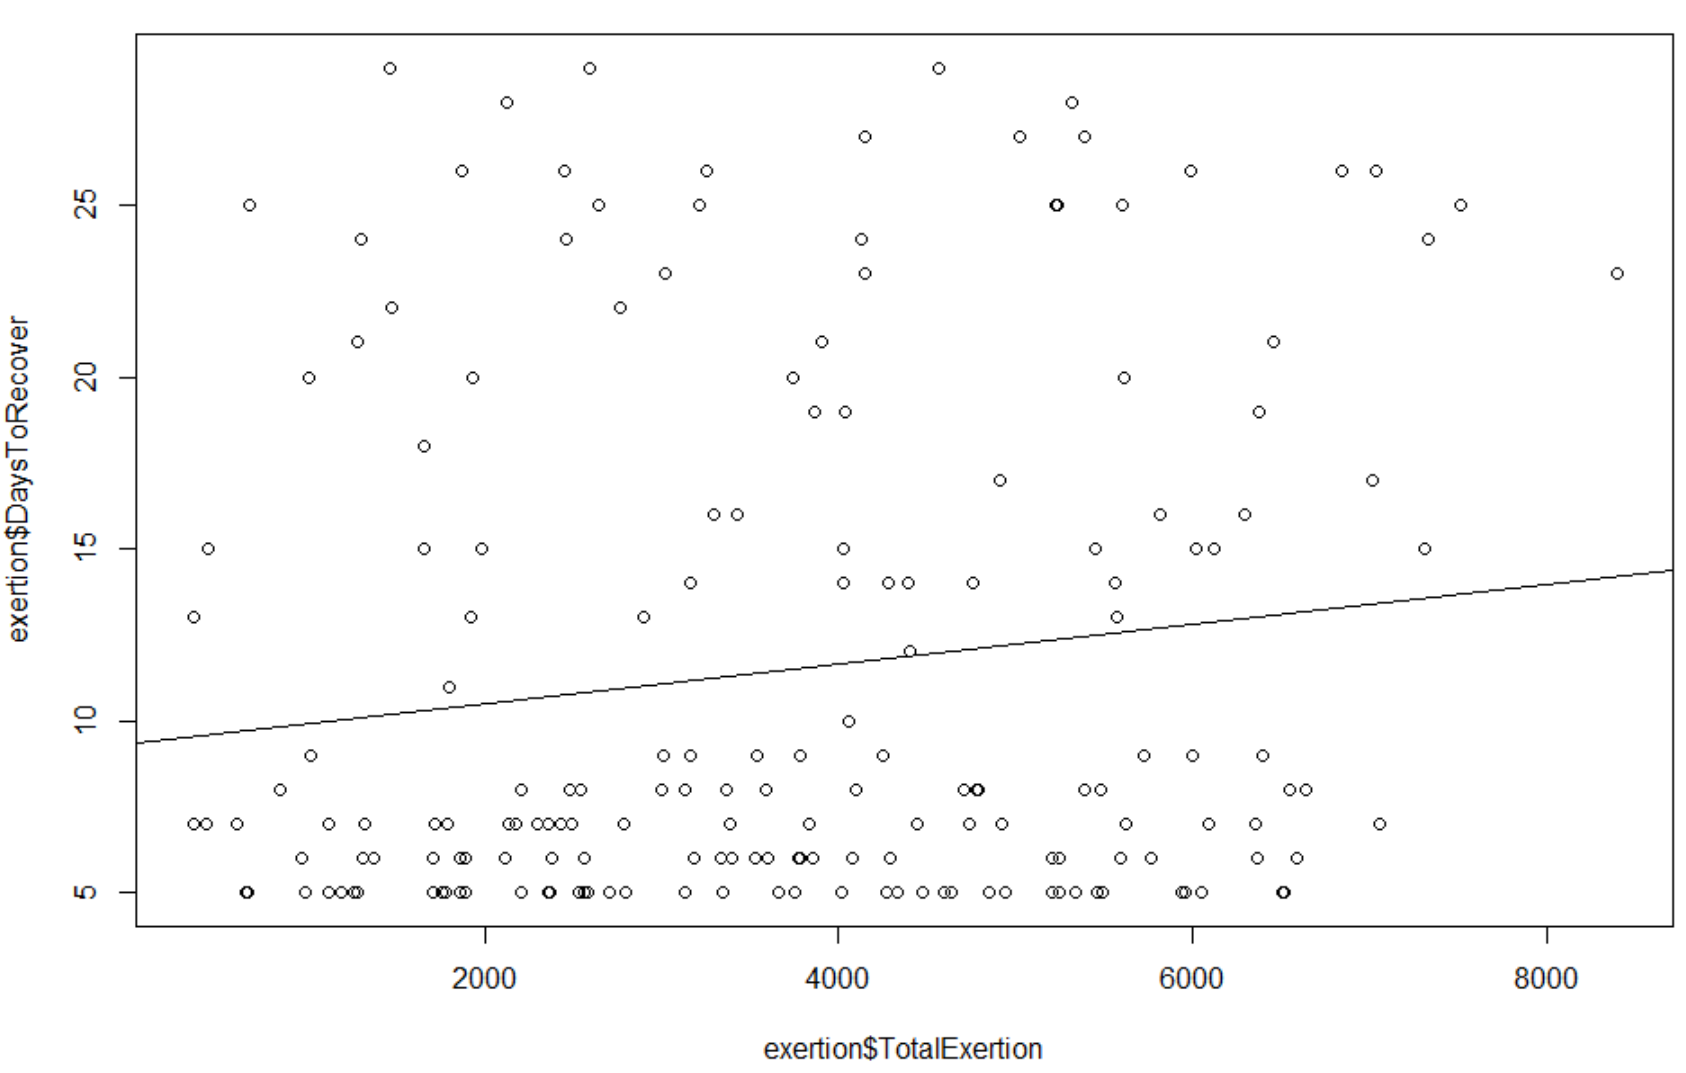

In [25]:
Image(filename="../Figures/exertion_regression.png", width=600, height=500)

The data was then used to calculate the time it took each player for each game to one standard deviation of exertion.

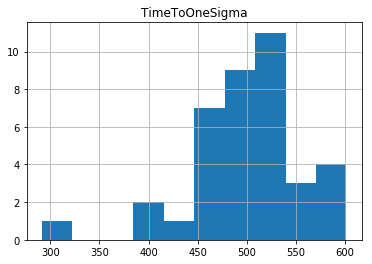

In [26]:
Image(filename="../Figures/p13_ttos.png", width=400, height=250)

## Next Steps

* Data can be used to build model based on player and target recovery window
* This model will tell coaches the chance that the player will require a certain recovery period based on their play time in a single game
* More Data!

In [27]:
HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>''')